## This is a notebook trying Mojo on Google Colaboratory, and compare the speed with Rust and Python

2023/09/17

Yutaro Ogawa

colab_runtime_type: V100 GPU

---


reference:  npaka-san

https://note.com/npaka/n/na900db7886ac


Thanks for the detailed explanation for beginners!

---

### [0] get your Modular Auth

[0.1] vist https://docs.modular.com/mojo/manual/get-started/

[0.2] click "Get the Mojo SDK" button

[0.3] then Your one time login code is emailed.

[0.4] type the code and the screen will change like below



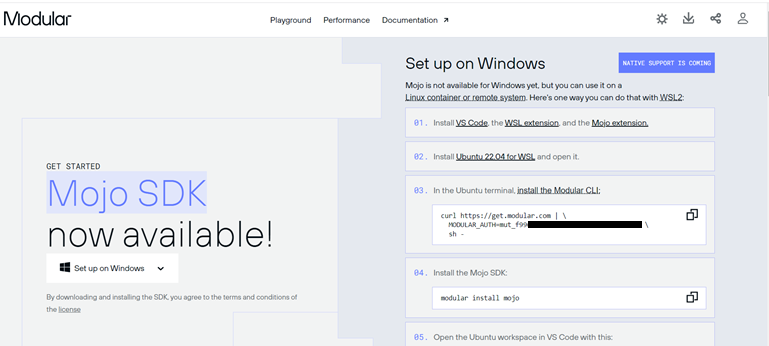

---

### [1] Install the Modular CLI

In [1]:
! curl https://get.modular.com | \
  MODULAR_AUTH=<YOUR_MODULAR_AUTH> \
  sh -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3176  100  3176    0     0  12966      0 --:--:-- --:--:-- --:--:-- 13016
Executing the  setup script for the 'modular/installer' repository ...

   OK: Checking for required executable 'curl' ...
   OK: Checking for required executable 'apt-get' ...
   OK: Detecting your OS distribution and release using system methods ...
 ^^^^: ... Detected/provided for your OS/distribution, version and architecture:
 >>>>:
 >>>>: ... distro=ubuntu  version=22.04  codename=jammy  arch=x86_64  
 >>>>:
 NOPE: Checking for apt dependency 'apt-transport-https' ...
   OK: Updating apt repository metadata cache ...
   OK: Attempting to install 'apt-transport-https' ...
   OK: Checking for apt dependency 'ca-certificates' ...
   OK: Checking for apt dependency 'gnupg' ...
   OK: Checking for apt signed-by key support ...
   OK: Importing 'modular

### [2] Install the Mojo SDK

In [2]:
!modular install mojo

# note
# I tried but cannnot install on the cpu runtime.

# Found release for https://packages.modular.com/mojo @ 0.2.1, installing to /root/.modular/pkg/packages.modular.com_mojo
# Downloads complete, setting configs...
# Configs complete, running post-install hooks...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter_client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.3.1 which is incompatible.
Testing `MODULAR_HOME=/root/.modular`
* `/root/.modular/pkg/packages.modular.com_mojo/bin/mojo`...
TEST: `mojo --help`... OK
TEST: `mojo run --help`... OK
TEST: `mojo build test_mandelbrot.mojo`... OK
TEST: `mojo build test_python.mojo`.

### [3] Set environment variables on Google Coalboratory

**Note**

!export works only in the context of a temporary session in the Colaboratory. Therefore, the setting of environment variables using export and the execution of the command immediately following it must be done in the same cell.


In [3]:
!export MODULAR_HOME="/root/.modular" && \
export PATH="/root/.modular/pkg/packages.modular.com_mojo/bin:$PATH" && \
mojo --version

mojo 0.2.1 (64d14e85)


---

### [4] check python and other versions

In [4]:
# CPU info
!lscpu


Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  8
  On-line CPU(s) list:   0-7
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:          6
    Model:               85
    Thread(s) per core:  2
    Core(s) per socket:  4
    Socket(s):           1
    Stepping:            3
    BogoMIPS:            4000.29
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscal
                         l nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopo
                         logy nonstop_tsc cpuid tsc_known_freq pni pclmulqdq sss
                         e3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes 
                         xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowpref

In [5]:
# GPU info
!nvidia-smi

Sun Sep 17 13:47:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import os
import sys
import torch

# -----------------------------
# check the environment info
# -----------------------------
def print_environment_info():
    print("Python version: ", sys.version)
    print("---------")
    print("PyTorch version: ",
    torch.__version__)
    print("GPU counts: ", torch.cuda.device_count())
    global device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("device: ", device)


# check
print_environment_info()

Python version:  3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
---------
PyTorch version:  2.0.1+cu118
GPU counts:  1
device:  cuda:0


In [7]:
# cpu

!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.146
cache size	: 39424 KB
physical id	: 0
siblings	: 8
core id		: 0
cpu cores	: 4
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

---

### [5] Speed Comparison with Python, Python+numba, Rust, and Mojo


reference of the program for time measurement

https://qiita.com/oioigohan/items/5d2b87826e6510dd4bcf

but I changed the variable tyep of count in the program from int to float.

I intentionally make the counts float type so that it takes longer to compute.

#### [5-1] Python Only (2,000 loop => 56.9s)

For a fair comparison, I use external execution instead of in-cell execution.

In [8]:
%%writefile main.py

import sys
import time


def f(n):
    # Main processing
    count = 0.0
    for i in range(n):
        for j in range(i):
            for _ in range(j):
                count += 1.0
    print(count)


    return count

if __name__ == "__main__":
    # Number of loop iterations from command line argument
    n = sys.argv[1]
    print("Number of iterations: ", n)
    n = int(n)

    # Execute the function
    # Start timing
    time_start = time.time()

    # main
    f(n)

    # Elapsed time (seconds)
    elapsed_time = time.time() - time_start
    print(str(elapsed_time) + "  [seconds]")


Writing main.py


In [9]:
!python3 main.py 2_000

Number of iterations:  2_000
1331334000.0
56.901106119155884  [seconds]


#### [5-2] Python + numba (JIT) (2,000 loop => 2.3s), (5,000 loop => 29.8)

In [10]:
%%writefile main.py

import sys
import time
from numba import njit


@njit  # this is equal @jit(nopython=True)
def f(n):
    # Main processing
    count = 0.0
    for i in range(n):
        for j in range(i):
            for _ in range(j):
                count += 1.0
    print(count)


    return count

if __name__ == "__main__":
    # Number of loop iterations from command line argument
    n = sys.argv[1]
    print("Number of iterations: ", n)
    n = int(n)

    # Execute the function
    # Start timing
    time_start = time.time()

    # main
    f(n)

    # Elapsed time (seconds)
    elapsed_time = time.time() - time_start
    print(str(elapsed_time) + "  [seconds]")


Overwriting main.py


In [11]:
!python3 main.py 2_000

Number of iterations:  2_000
1331334000.0
2.304783821105957  [seconds]


In [12]:
!python3 main.py 5_000

Number of iterations:  5_000
20820835000.0
29.810083627700806  [seconds]


#### [5-3] RUST (2,000 loop => 1.9s), (5,000 loop => 29.4s)

First, put in Cargo (using Rust on Google Colaboratory requires a quirk).

Cargo is the Rust build system and package manager.

In [13]:
!apt install cargo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libstd-rust-1.66 libstd-rust-dev rustc
Suggested packages:
  cargo-doc llvm-15 lld-15 clang-15
The following NEW packages will be installed:
  cargo libstd-rust-1.66 libstd-rust-dev rustc
0 upgraded, 4 newly installed, 0 to remove and 32 not upgraded.
Need to get 71.0 MB of archives.
After this operation, 300 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstd-rust-1.66 amd64 1.66.1+dfsg0ubuntu1-0ubuntu0.22.04.1 [21.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libstd-rust-dev amd64 1.66.1+dfsg0ubuntu1-0ubuntu0.22.04.1 [41.9 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 rustc amd64 1.66.1+dfsg0ubuntu1-0ubuntu0.22.04.1 [3,213 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 cargo amd64 0.67.1+ds0ubuntu0.libgit

In [14]:
# Create a Rust project

In [15]:
!cargo new for_loop_rust
%cd for_loop_rust

     Created binary (application) `for_loop_rust` package
/content/for_loop_rust


In [16]:
%%writefile src/main.rs

use std::time::Instant;

fn main() {
    let time_start = Instant::now();  // Start measuring time

    // Number of loops (hardcoded for simplicity)
    let n: i64 = 2_000;

    // Main processing
    let mut count: f64 = 0.0;
    for i in 0..n {
        for j in 0..i {
            for _ in 0..j {
                count += 1.0;
            }
        }
    }

    // Measurement finished
    println!("{:?} elapsed", time_start.elapsed());
    println!("Number of loops: {}", count)
}


Overwriting src/main.rs


In [17]:
# Run the Rust file
# debug mode generates programs that run faster in release mode instead of debug mode

# no debug mode
!cargo run --release

   Compiling for_loop_rust v0.1.0 (/content/for_loop_rust)
    Finished release [optimized] target(s) in 0.98s
     Running `target/release/for_loop_rust`
1.891476289s elapsed
Number of loops: 1331334000


In [18]:
%%writefile src/main.rs

use std::time::Instant;

fn main() {
    let time_start = Instant::now();  // Start measuring time

    // Number of loops (hardcoded for simplicity)
    let n: i64 = 5_000;

    // Main processing
    let mut count: f64 = 0.0;
    for i in 0..n {
        for j in 0..i {
            for _ in 0..j {
                count += 1.0;
            }
        }
    }

    // Measurement finished
    println!("{:?} elapsed", time_start.elapsed());
    println!("Number of loops: {}", count)
}


Overwriting src/main.rs


In [19]:
# Run the Rust file
# debug mode generates programs that run faster in release mode instead of debug mode

# no debug mode
!cargo run --release

   Compiling for_loop_rust v0.1.0 (/content/for_loop_rust)
    Finished release [optimized] target(s) in 0.39s
     Running `target/release/for_loop_rust`
29.369809643s elapsed
Number of loops: 20820835000


#### [5-4] Mojo (2,000 loop => 1.9s), (5,000 loop => 29.3s)

In [20]:
%%writefile main.mojo


from time import now


def f(n):
    var count: Float64 = 0.0

    # Main processing
    for i in range(n):
        for j in range(i):
            for k in range(j):
                count += 1.0

    return count



# execute main
def main():

    # Execute the function
    # Start timing
    let time_start = now()

    # main
    let n: Int64 = 2_000  # Hardcode the number of loops
    count = f(n)

    # Elapsed time (seconds)
    let eval_end = now()
    let execution_time_sequential = Float64(eval_end - time_start)
    print(execution_time_sequential / 1000_000_000)
    # count
    print(count)


Writing main.mojo


In [21]:
# execution

!export MODULAR_HOME="/root/.modular" && \
export PATH="/root/.modular/pkg/packages.modular.com_mojo/bin:$PATH" && \
mojo main.mojo


1.905706744
1331334000.0


In [22]:
%%writefile main.mojo


from time import now


def f(n):
    var count: Float64 = 0.0

    # Main processing
    for i in range(n):
        for j in range(i):
            for k in range(j):
                count += 1.0

    return count



# execute main
def main():

    # Execute the function
    # Start timing
    let time_start = now()

    # main
    let n: Int64 = 5_000  # Hardcode the number of loops
    count = f(n)

    # Elapsed time (seconds)
    let eval_end = now()
    let execution_time_sequential = Float64(eval_end - time_start)
    print(execution_time_sequential / 1000_000_000)
    # count
    print(count)


Overwriting main.mojo


In [23]:
# execution

!export MODULAR_HOME="/root/.modular" && \
export PATH="/root/.modular/pkg/packages.modular.com_mojo/bin:$PATH" && \
mojo main.mojo


29.295458973999999
20820835000.0


### [6] Results of each Speed

| Language/Library                | Loop Count (2,000 loop) | Loop Count (5,000 loop) |
|---------------------------------|-------------------------|-------------------------|
| Python Only                     | 56.9s                     | -                       |
| Python + numba (JIT)           | 2.3s                    | 29.8s                   |
| RUST                            | 1.9s                    | 29.4s                   |
| Mojo                            | 1.9s                    | 29.3s                   |


---